# <center> Consumer Finance Company</center>
#### The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

####  The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 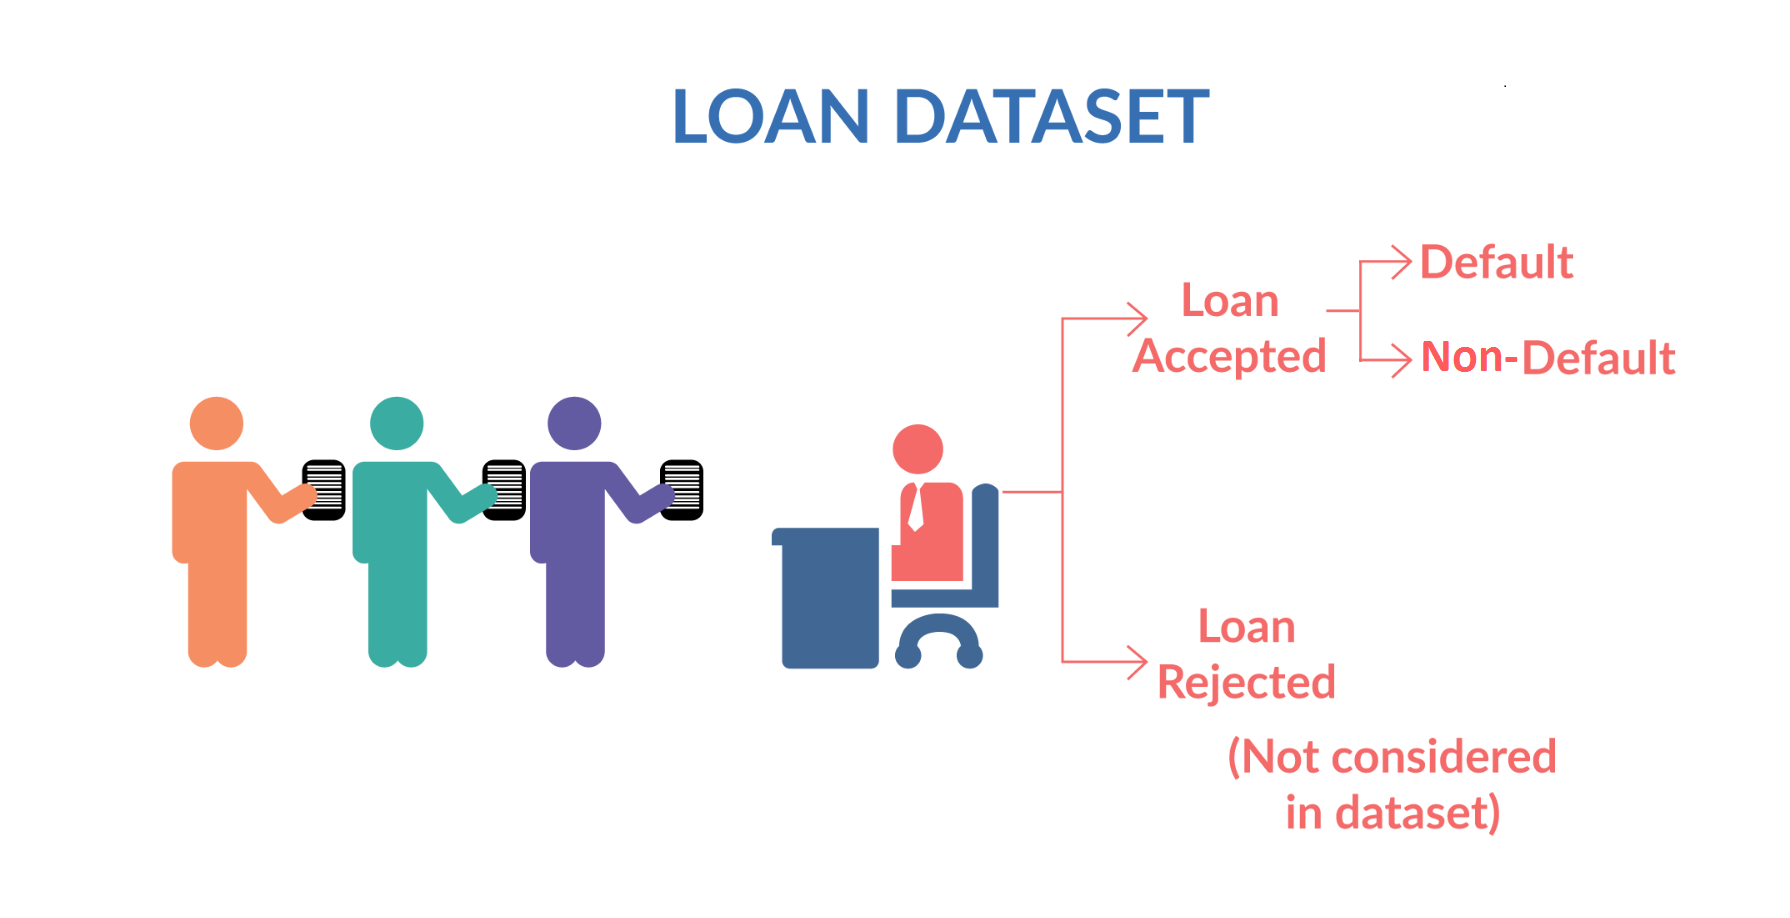

# **Importing the Libraries and Loading dataset**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [242]:
#loading dataset
loan = pd.read_csv("loan.csv")
#Looking at dataset prooperties like shape, datatypes, etc.
loan.shape
loan.info()
loan.dtypes
loan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA
## **Data Cleaning**

In [113]:
print(loan.count())

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [243]:
# Filtering down columns with row count greater than 0.
loan =loan[[cols for cols in loan  if loan[cols].count()>0]]
loan.shape

(39717, 57)

##### out of 111 their 57 columns have count greater than zero

In [244]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [245]:
loan.isnull().sum()     #looking out for significant null value count in any col

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [246]:
#Removing rest of the columns which are not necessary for analysis
loan.drop(["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","member_id","url","emp_title","zip_code", "policy_code", ],axis=1,inplace=True)

In [247]:
# Cleaning employee length column - Removing String part for ease of analysis, Filling null values
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1,...,May-16,67.79,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,0.0


In [248]:
# Removing 'months' String from term column
loan['term']=loan['term'].str.rstrip('months')
loan["term"] = loan["term"].astype("int64")   # changing the data type into integer

In [249]:
# Removing % symbol from interest rate col
loan["int_rate"] = loan["int_rate"].str.rstrip('%')
#  change the int_rate into float type
loan["int_rate"] = loan["int_rate"].astype("float64")

In [250]:
# Since we only looking at historical data, we'll remove the ids with active/ongoing loan status
loan = loan[loan.loan_status != "Current"]

In [251]:
# Further dropping column not required
loan = loan.drop(["last_pymnt_d","collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens", "out_prncp","out_prncp_inv", "acc_now_delinq", "delinq_amnt"],axis=1)
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   loan_amnt                38577 non-null  int64  
 2   funded_amnt              38577 non-null  int64  
 3   funded_amnt_inv          38577 non-null  float64
 4   term                     38577 non-null  int64  
 5   int_rate                 38577 non-null  float64
 6   installment              38577 non-null  float64
 7   grade                    38577 non-null  object 
 8   sub_grade                38577 non-null  object 
 9   emp_length               38577 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.99    234144.0
Name: annual_inc, dtype: float64

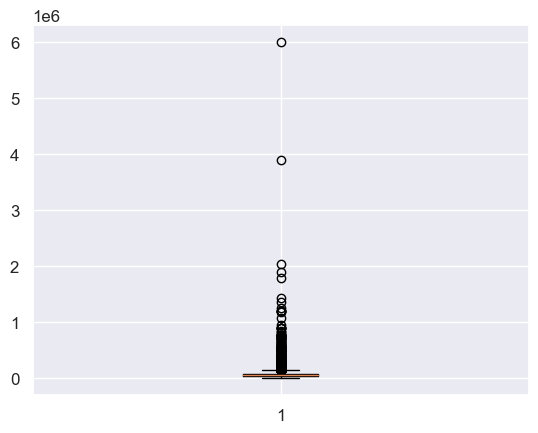

In [252]:
# Detecting Outliers in annual income field
plt.boxplot(loan.annual_inc)
loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd97394dd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9739741c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd97394da30>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd973974760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd973974a30>],
 'means': []}

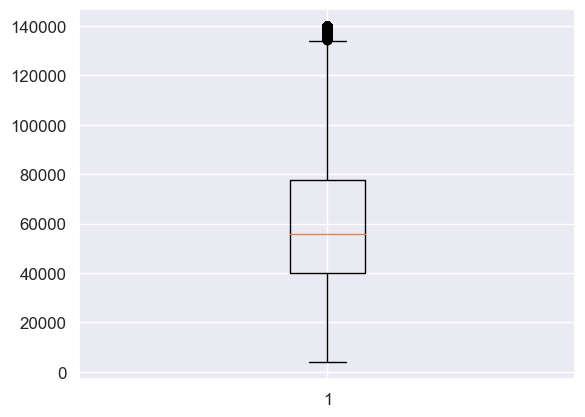

In [253]:
# Removing outliers
loan = loan[loan.annual_inc < loan.annual_inc.quantile(0.95)]
plt.boxplot(loan.annual_inc)

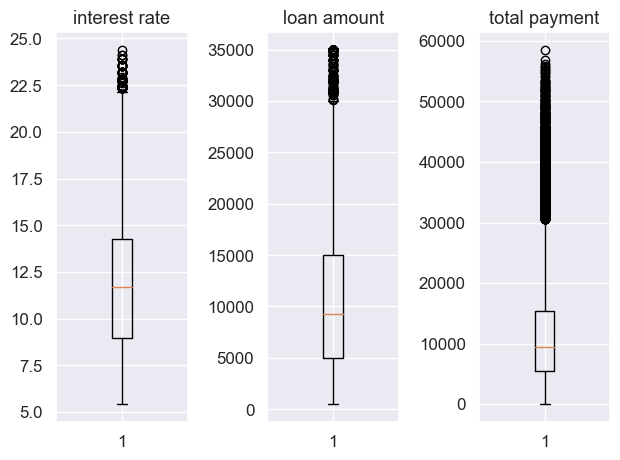

In [254]:
# Looking for outliers in other important fields

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.boxplot(loan.int_rate)
ax1.set_title('interest rate')
ax2.boxplot(loan.loan_amnt)
ax2.set_title('loan amount')
ax3.boxplot(loan.total_pymnt)
ax3.set_title('total payment')

fig.tight_layout()
plt.show()

##### We observed that there are extreme values but distribution is mostly continous so we'll not remove the outliers

#### Creating bins or buckets for analysis sake

In [325]:
# Categorising the loan amount, annual_inc, int_rate, and dti columns for bivariate analysis
loan['loan_amnt_cat']=pd.cut(loan['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])

loan['annual_inc_cat']=pd.cut(loan['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

loan['int_rate_cat']=pd.cut(loan['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

loan['dti_cat']=pd.cut(loan['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,application_type,pub_rec_bankruptcies,loan_amnt_cat,annual_inc_categories,interest_rate_categories,dti_categories,annual_inc_cat,interest_rate_cat,dti_cat,int_rate_cat
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,INDIVIDUAL,0.0,0-7000,20000-40000,10-13,NaN,20000-40000,10-13,NaN,10-13
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,INDIVIDUAL,0.0,0-7000,20000-40000,12.5-16,0-5,20000-40000,12.5-16,0-5,12.5-16
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,INDIVIDUAL,0.0,0-7000,0-20000,12.5-16,5-10,0-20000,12.5-16,5-10,12.5-16
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,INDIVIDUAL,0.0,7000-14000,40000-60000,12.5-16,15-20,40000-60000,12.5-16,15-20,12.5-16
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,...,INDIVIDUAL,0.0,0-7000,20000-40000,0-10,10-15,20000-40000,0-10,10-15,0-10



# **Univariate Analysis**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

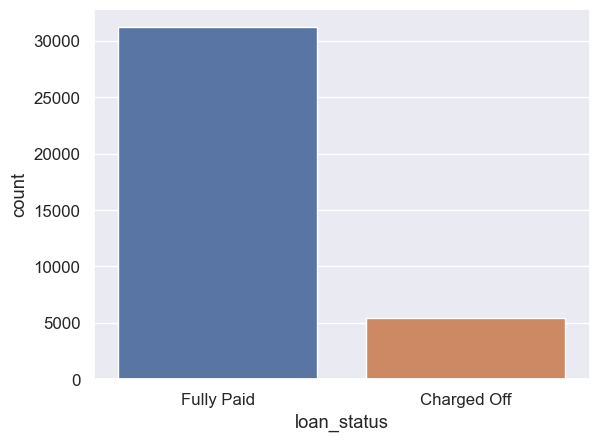

In [256]:
# Starting with most important column - loan status
sns.countplot(loan.loan_status)

##### We'll analyse important feature coulumns individually as they could be possible affecting factors for Loan Status of an Account.

[Text(0.5, 1.0, 'Major reason for loan is debt consolidation, i.e, taking loan to pay off another amount')]

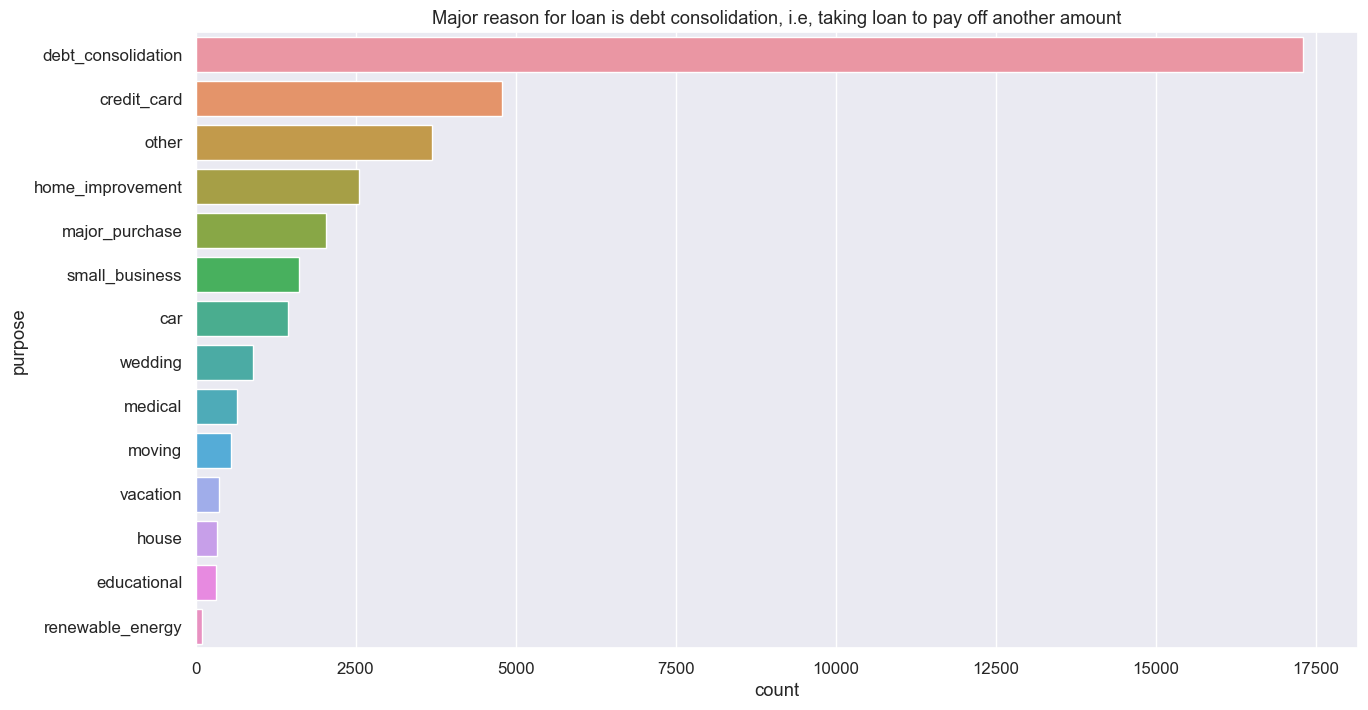

In [257]:
# Looking into factor of Purpose of taking loan 
plt.figure(figsize=(15,8))
ax = sns.countplot(y="purpose", data=loan,order=loan['purpose'].value_counts().index)
ax.set(title="Major reason for loan is debt consolidation, i.e, taking loan to pay off another amount")

[Text(0.5, 1.0, 'CA, NY, FL, TX, and NJ are top 5 states in taking loans')]

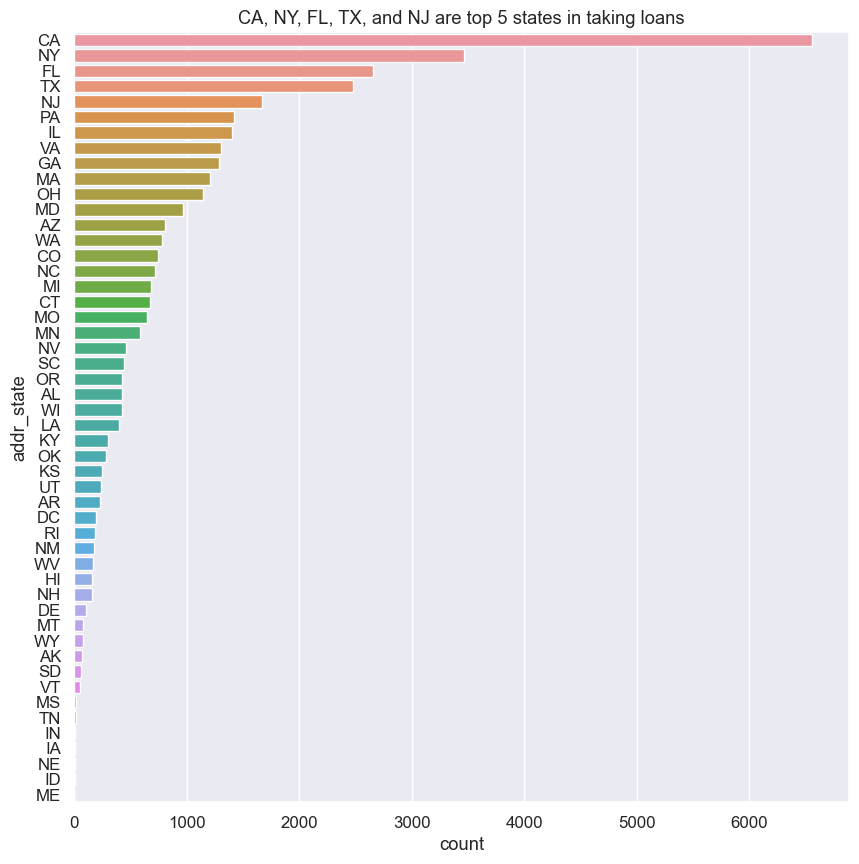

In [258]:
# Analysing loan desity Region-wise
plt.figure(figsize=(10,10))
ax = sns.countplot(y="addr_state", data=loan,order=loan['addr_state'].value_counts().index)
ax.set(title="CA, NY, FL, TX, and NJ are top 5 states in taking loans")

[Text(0.5, 1.0, 'Term of 36 Months(shorter Period) is seen more opted')]

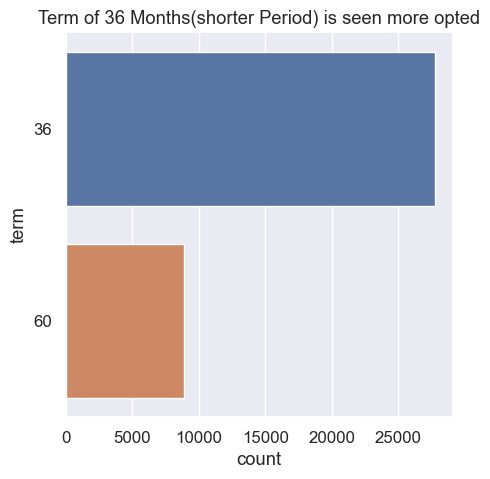

In [376]:
# Analysing loan desity Region-wise
plt.figure(figsize=(5,5))
ax = sns.countplot(y="term", data=loan,order=loan['term'].value_counts().index)
ax.set(title="Term of 36 Months(shorter Period) is seen more opted")

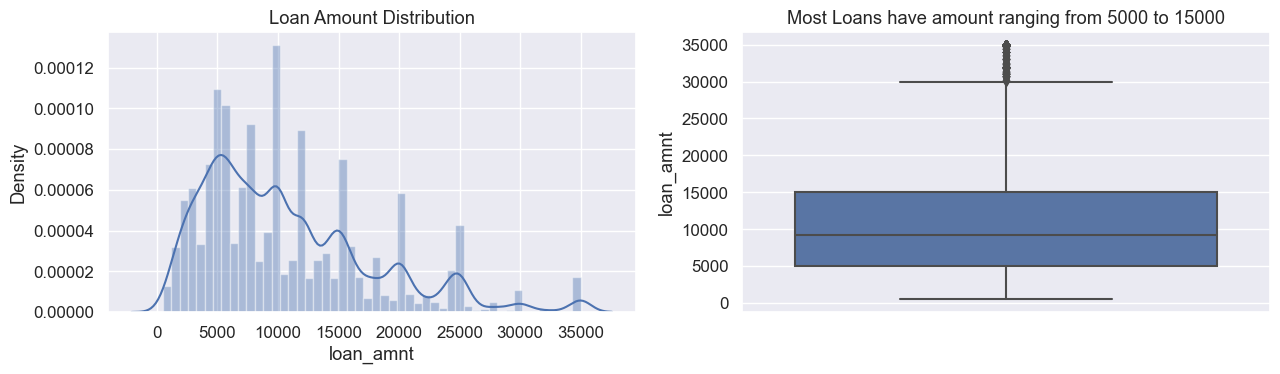

In [259]:
# Analysing Loan Density
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax1=sns.distplot(loan['loan_amnt'])
ax1.set(title='Loan Amount Distribution')

plt.subplot(2,2,2)
ax2=sns.boxplot(y=loan['loan_amnt'])
ax2.set(title="Most Loans have amount ranging from 5000 to 15000")
fig.tight_layout()
plt.show()

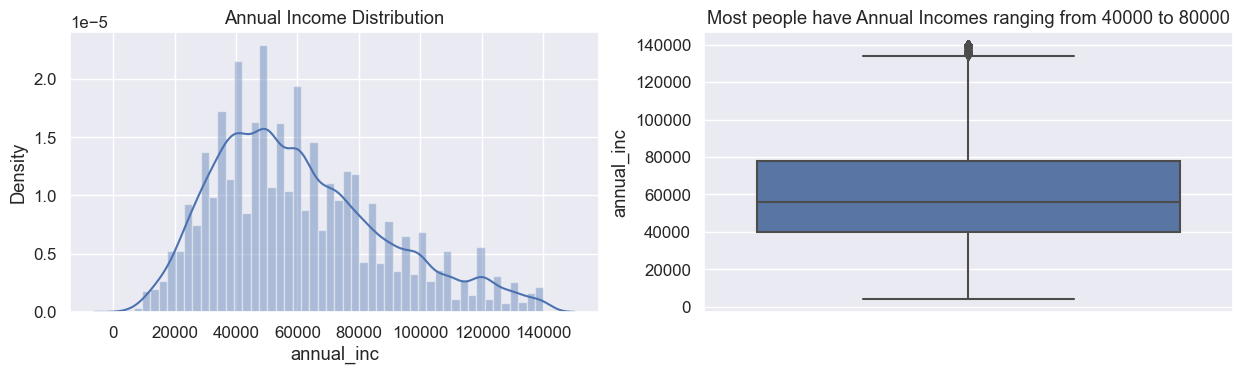

In [260]:
# Analysing Annual Income
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax1=sns.distplot(loan['annual_inc'])
ax1.set(title='Annual Income Distribution')

plt.subplot(2,2,2)
ax2=sns.boxplot(y=loan['annual_inc'])
ax2.set(title="Most people have Annual Incomes ranging from 40000 to 80000")
fig.tight_layout()
plt.show()

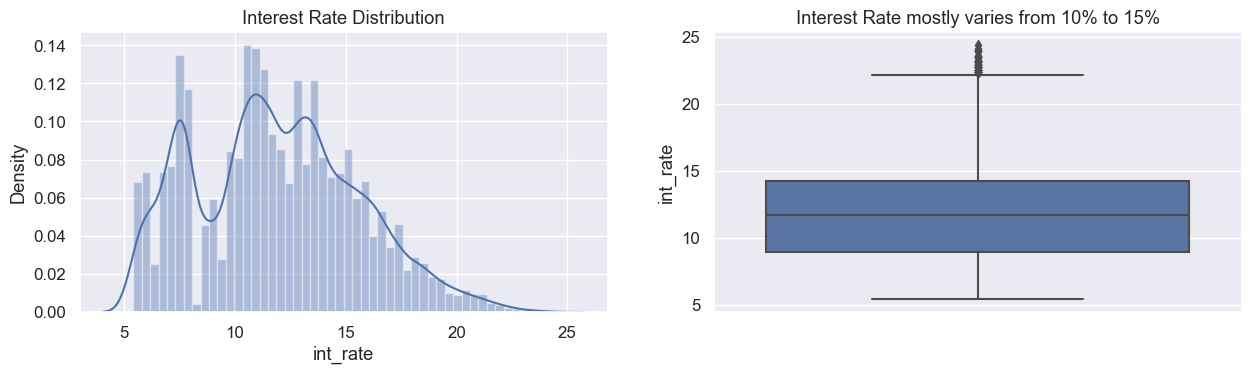

In [388]:
# Analysing Interest Rate
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax1=sns.distplot(loan['int_rate'])
ax1.set(title='Interest Rate Distribution')

plt.subplot(2,2,2)
ax2=sns.boxplot(y=loan['int_rate'])
ax2.set(title="Interest Rate mostly varies from 10% to 15%")
fig.tight_layout()
plt.show()


# **Bivariate Analysis**

<AxesSubplot:>

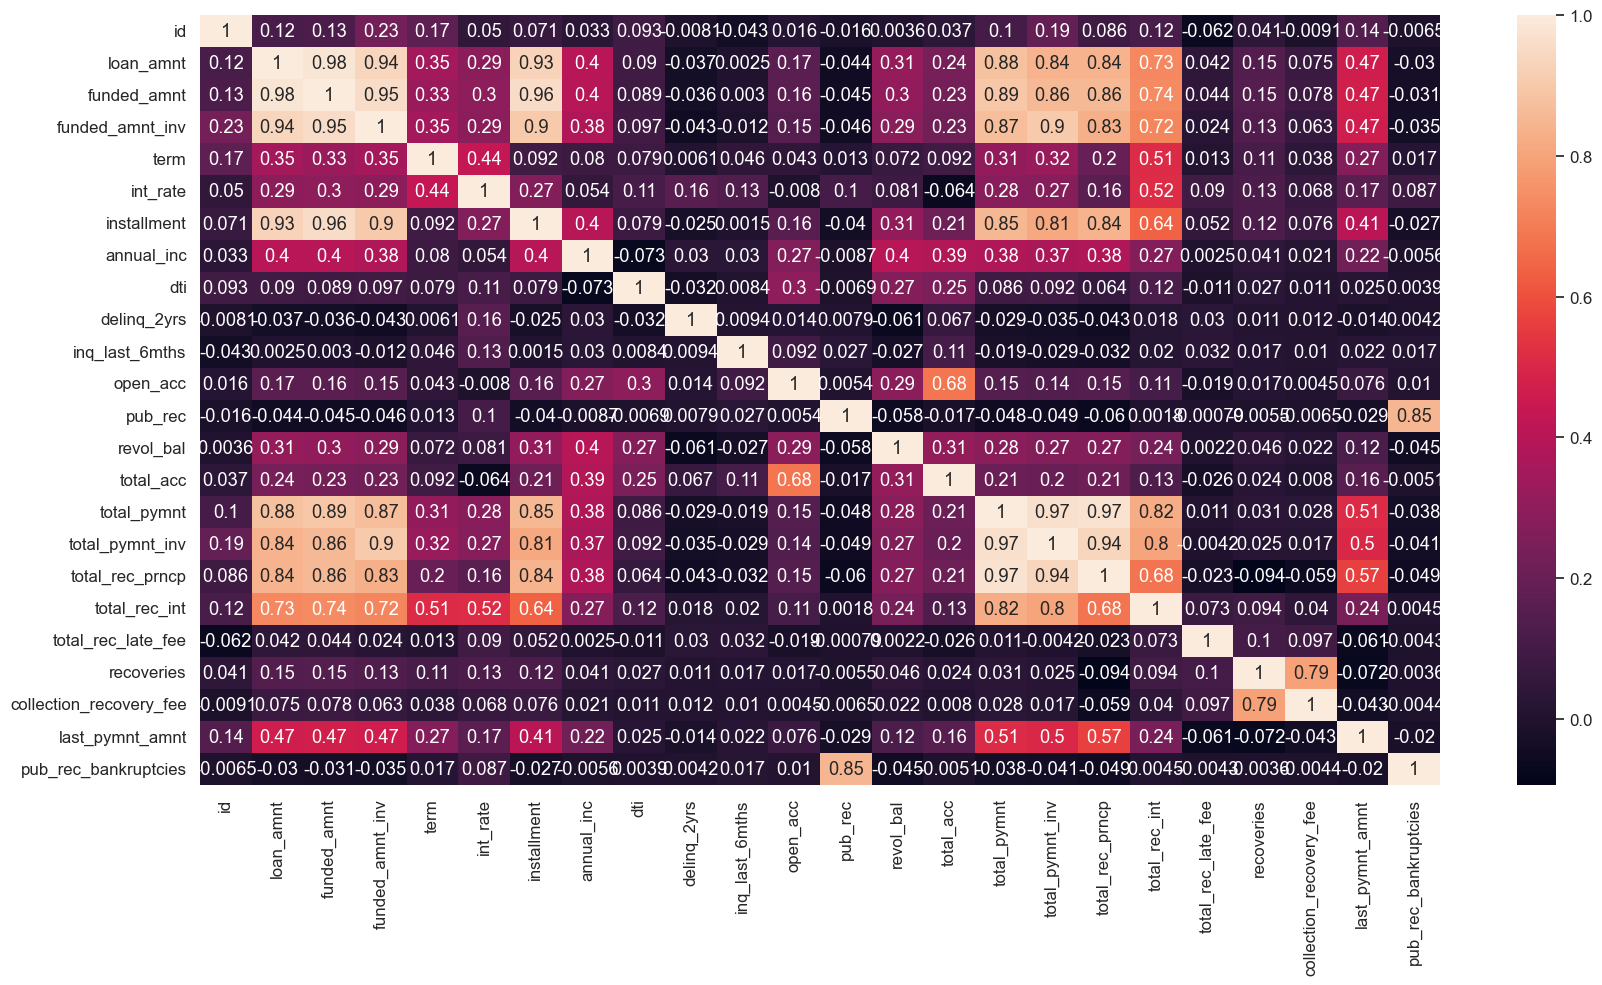

In [264]:
# Let's try to find correlations between the numeric fields (If any)
plt.figure(figsize=(20,10))
sns.heatmap(loan.corr(), annot=True)

#### Using Correlation matrix  we have following observations:
 1. Annual Income to Debt To Income Ratio i.e. dti are negatively correlated
 
 2. Loan Amount,Investor Amount and Funding Amount are strongly correlated

 3. Positive correlation between Annual Income and employment years
 
 4. Positive correlation between annual income and funded amount that means people with high income gets high funded amount
 5. Positive correlation between annual income and total payment

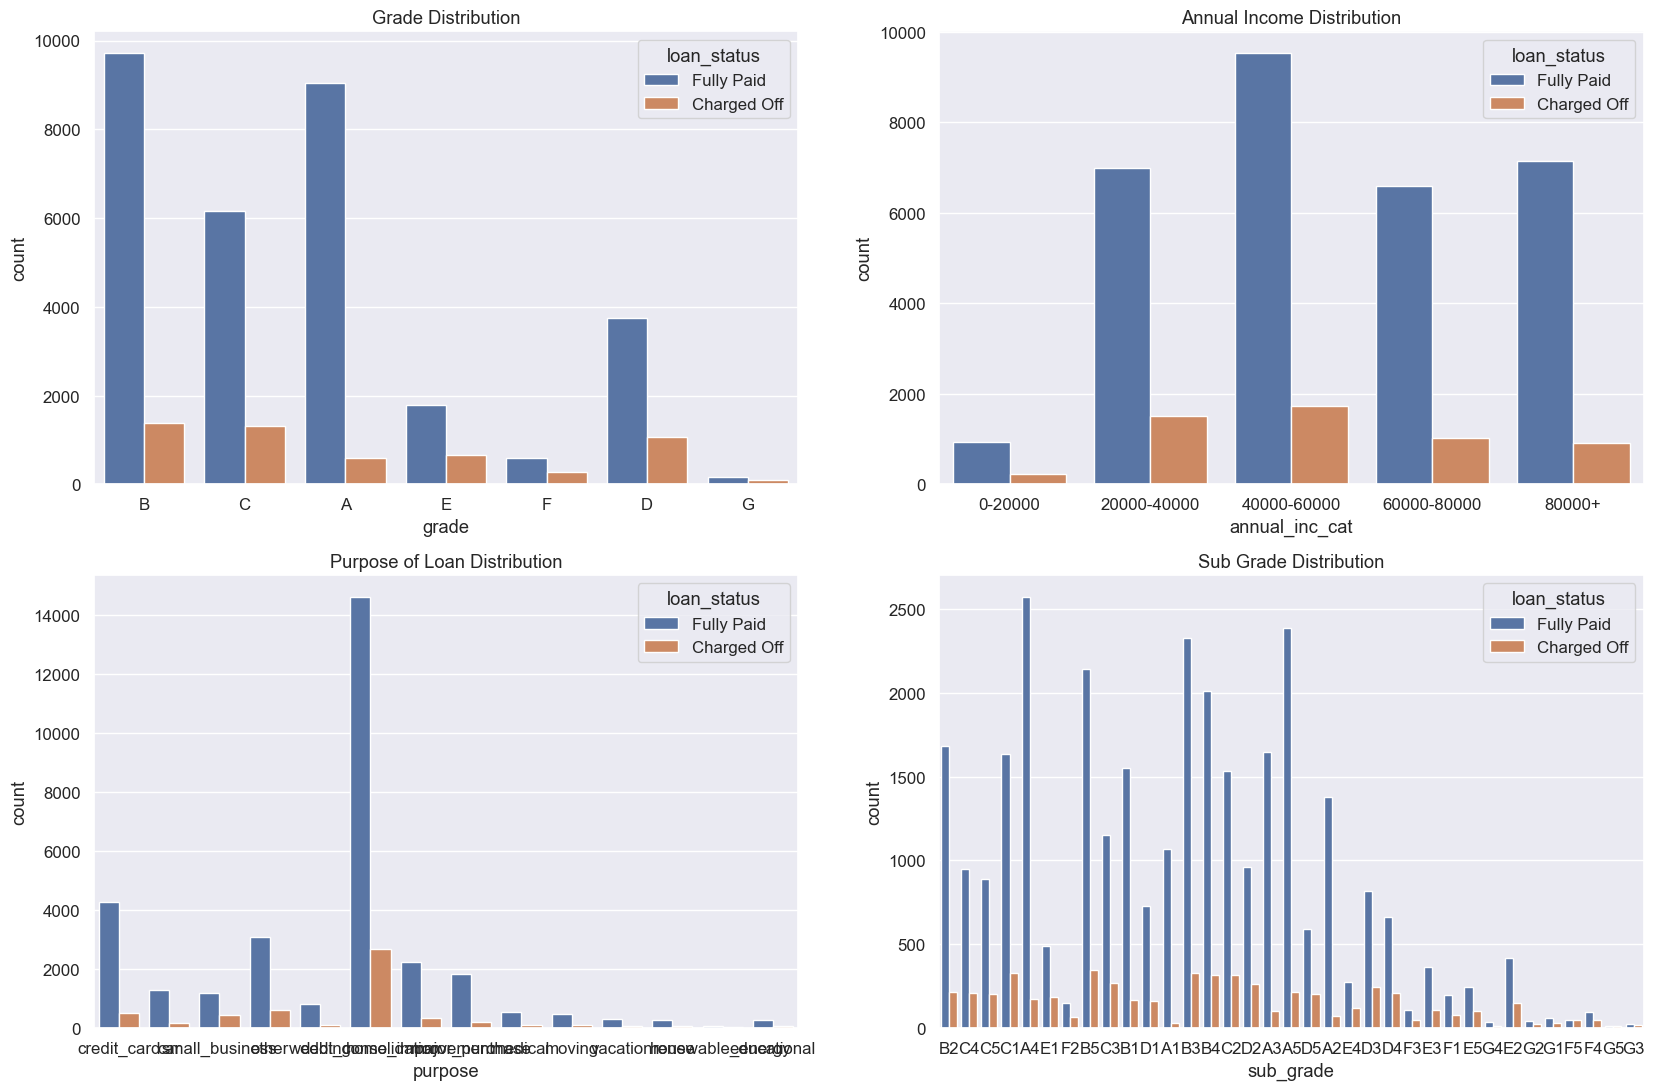

In [399]:
#Let's try to see the distribution of some features against loan status
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
ax1=sns.countplot(x='grade', data=loan, hue='loan_status')
ax1.set(title='Grade Distribution')

plt.subplot(3,2,2)
ax2=sns.countplot(x='annual_inc_cat', data=loan, hue='loan_status')
ax2.set(title='Annual Income Distribution')

plt.subplot(3,2,3)
ax3=sns.countplot(x='purpose', data=loan, hue='loan_status')
ax3.set(title='Purpose of Loan Distribution')

plt.subplot(3,2,4)
ax1=sns.countplot(x='sub_grade', data=loan, hue='loan_status')
ax1.set(title='Sub Grade Distribution')

plt.show()

#### We observed that there's significant difference between the Fully Paid and Charged Off counts for all these categories. Hence, we do not have much difference (insights wise) from the univariate analysis. So we'll try to look at count distribution of these columns as Charged Off Perfcentage, i.e. ratio of defualters out of total.

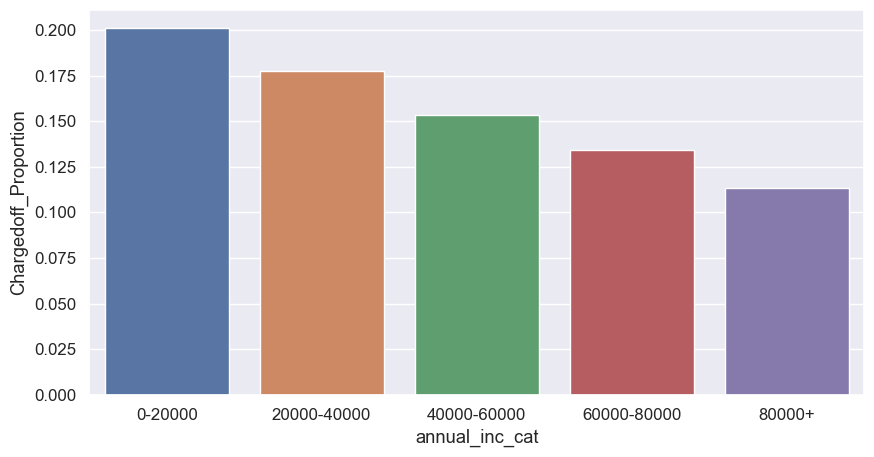

In [345]:
#Showing Charged Off proportion against Annual Income
inc_loan = loan.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_loan['Total'] = inc_loan['Charged Off'] + inc_loan['Fully Paid'] 
inc_loan['Chargedoff_Proportion'] = inc_loan['Charged Off'] / inc_loan['Total']

plt.figure(figsize=(10,5))
ax.set(title='Annual Income Vs. Charged Proportion')
ax=sns.barplot(x='annual_inc_cat',y='Chargedoff_Proportion',data=inc_loan)

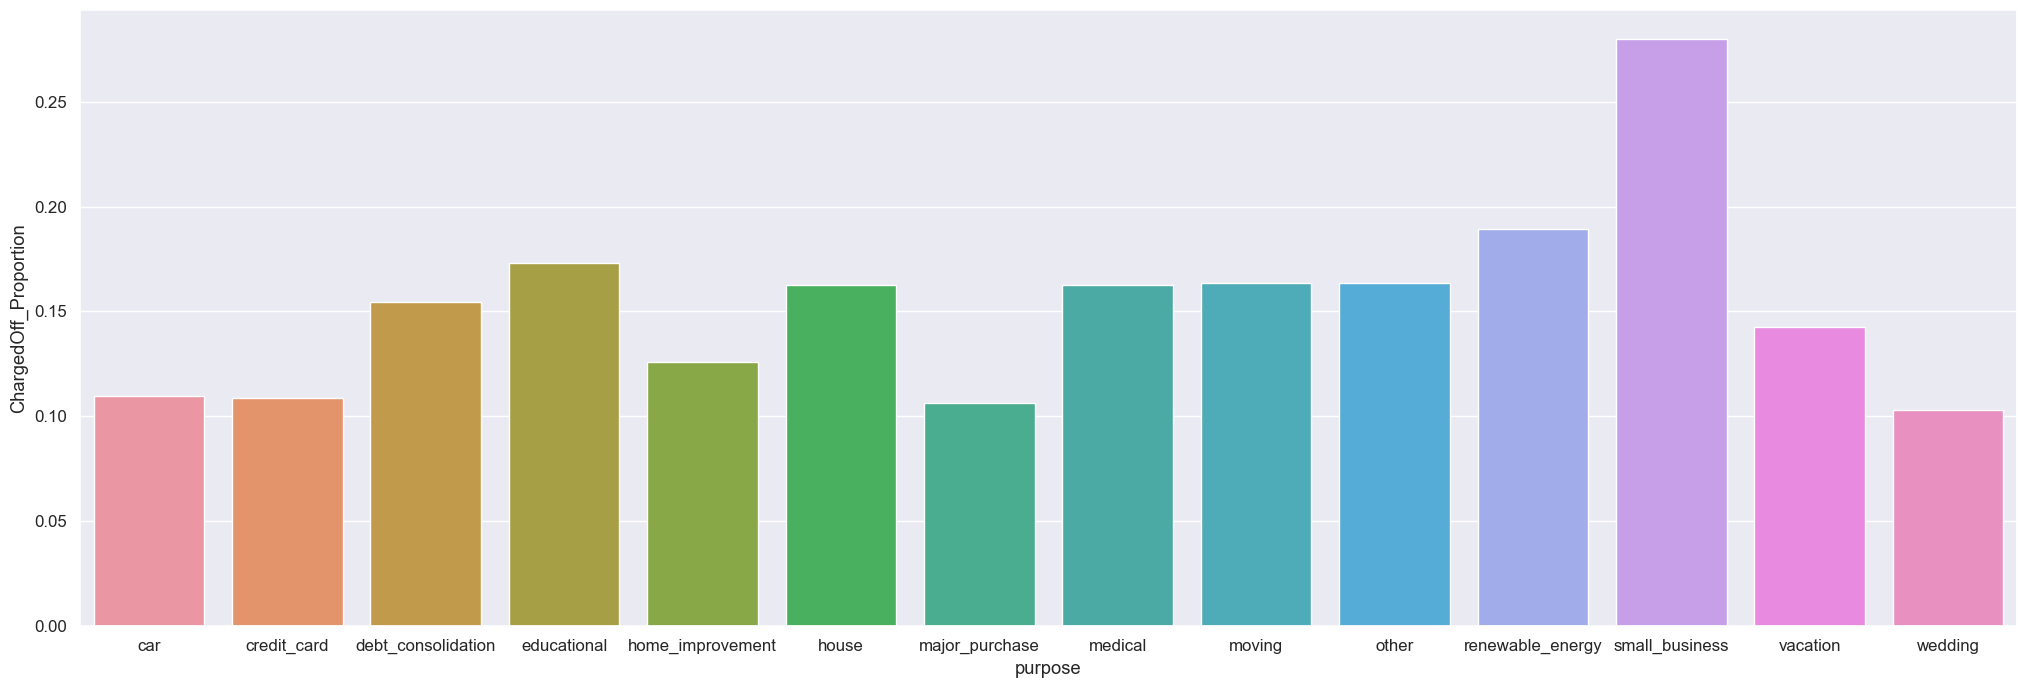

In [344]:
#Showing Charged Off proportion against Purpose
purpose_loan = loan.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_loan['Total']=purpose_loan['Charged Off']+purpose_loan['Fully Paid']
purpose_loan['ChargedOff_Proportion']=purpose_loan['Charged Off']/purpose_loan['Total']

plt.figure(figsize=(25,8))
ax=sns.barplot(x='purpose',y='ChargedOff_Proportion',data=purpose_loan)

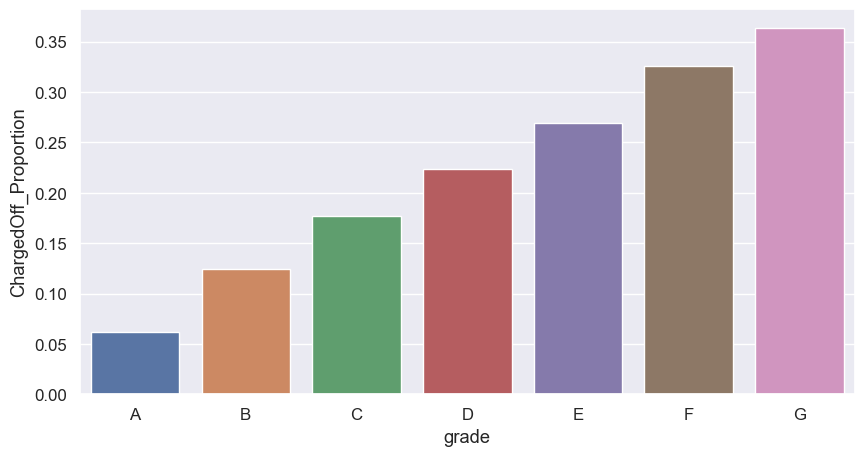

In [339]:
#Showing Charged Off proportion against Grade
grade_loan=loan.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_loan['Total'] = grade_loan['Charged Off'] + grade_loan['Fully Paid']
grade_loan['ChargedOff_Proportion']=grade_loan['Charged Off']/grade_loan['Total']

plt.figure(figsize=(10,5))
ax=sns.barplot(x='grade',y='ChargedOff_Proportion',data=grade_loan)

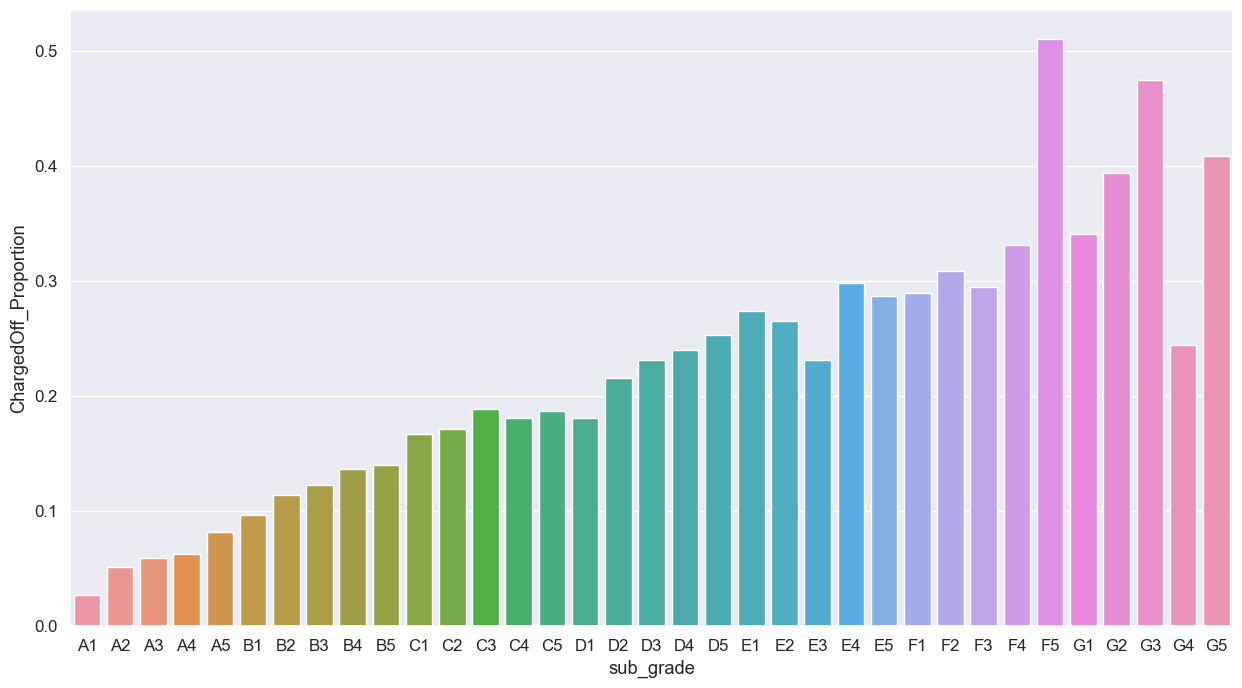

In [346]:
#Showing Charged Off proportion against Sub-grade
sgrade_loan=loan.groupby(['sub_grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sgrade_loan['Total']=sgrade_loan['Charged Off'] + sgrade_loan['Fully Paid']
sgrade_loan['ChargedOff_Proportion']=sgrade_loan['Charged Off']/sgrade_loan['Total']

plt.figure(figsize=(15,8))
ax=sns.barplot(x='sub_grade',y='ChargedOff_Proportion',data=sgrade_loan)

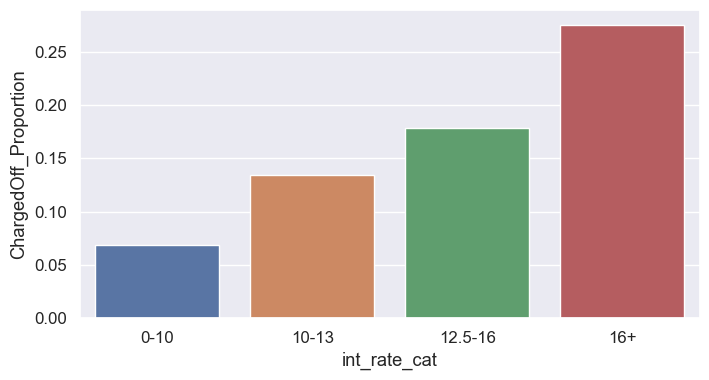

In [337]:
#Showing Charged Off proportion against Interest rate categories
int_loan = loan.groupby(['int_rate_cat','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
int_loan['Total'] = int_loan['Charged Off'] + int_loan['Fully Paid']
int_loan['ChargedOff_Proportion'] = int_loan['Charged Off']/int_loan['Total']

plt.figure(figsize=(8,4))
ax=sns.barplot(x='int_rate_cat',y='ChargedOff_Proportion',data=int_loan)

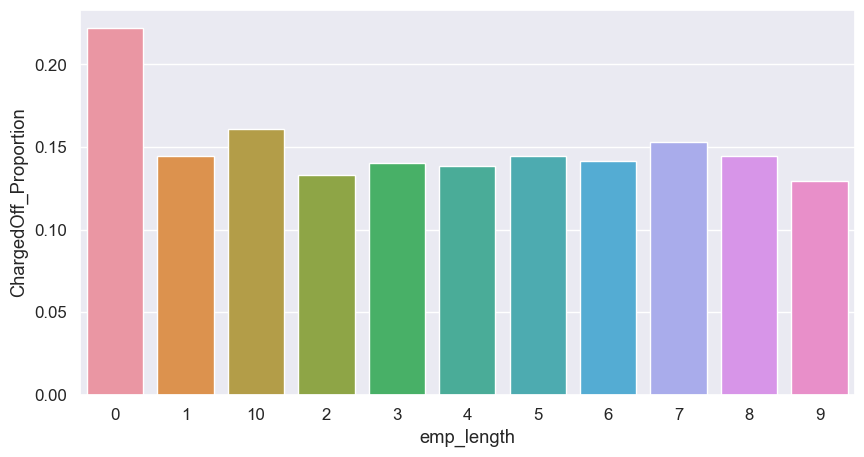

In [334]:
#Showing Charged Off proportion against Employee Tenure
emplen_loan = loan.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_loan['Total'] = emplen_loan['Charged Off'] + emplen_loan['Fully Paid']
emplen_loan['ChargedOff_Proportion'] = emplen_loan['Charged Off']/emplen_loan['Total']

plt.figure(figsize=(10,5))
ax=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_loan)

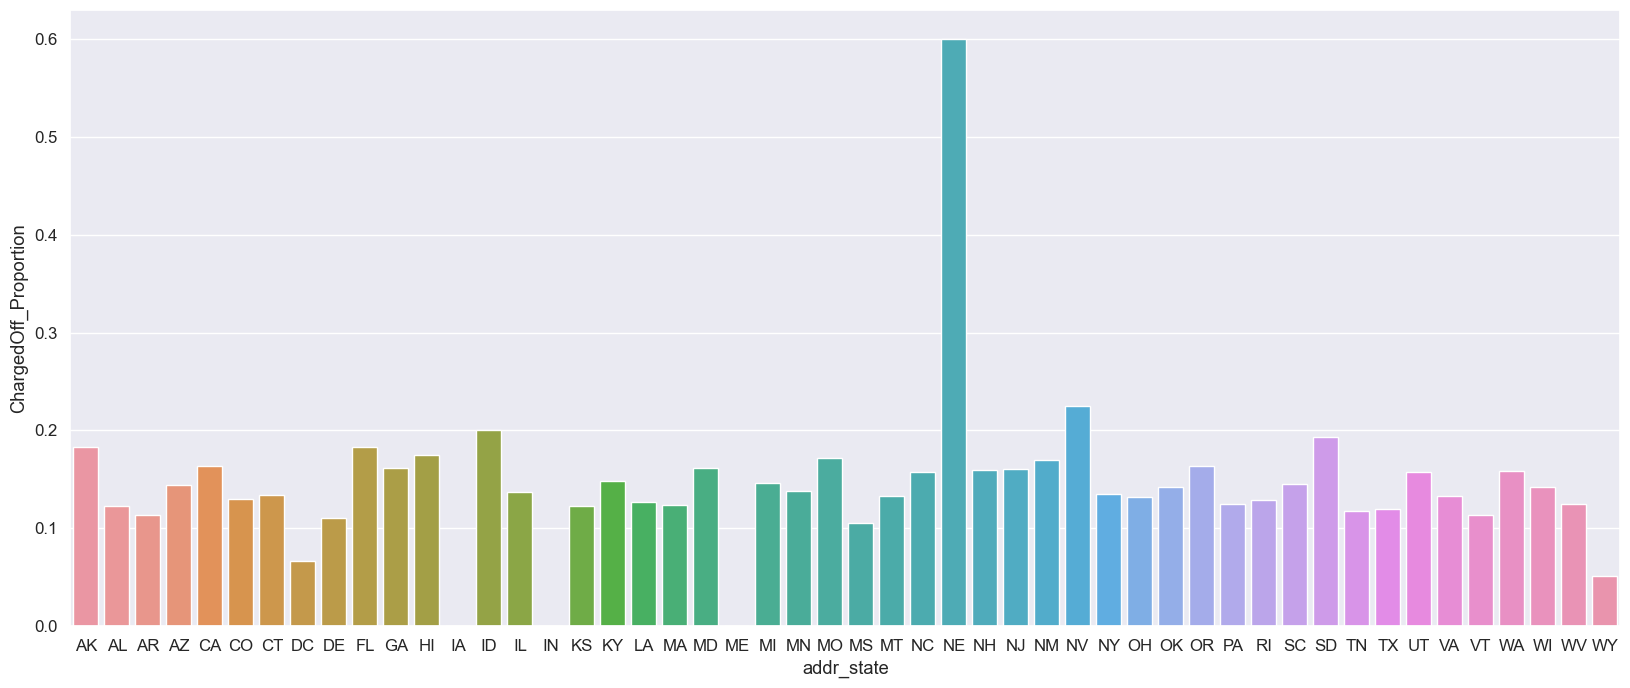

In [331]:
#Showing Charged Off proportion against State
state_loan = loan.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_loan['Total'] = state_loan['Charged Off'] + state_loan['Fully Paid']
state_loan['ChargedOff_Proportion'] = state_loan['Charged Off']/state_loan['Total']

plt.figure(figsize=(20,8))
ax=sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_loan)

#### Observations from above charts:
1. Income range 80000+  has less chances of charged off.
2. Income range 0-20000 has high chances of charged off.
3. Notice that with increase in annual income charged off proportion got decreased. So, they are inversely proportional.

4. Small Business applicants have high chances of getting charged off.
5. Renewable_energy where chanrged off proportion is better as compare to other categories.

6. Grade A has least chances of getting charged off
7. Grade F and Grade G have high chances of getting charged off
8. Chances of getting charged off is increasing  with grades moving from A to G

9. Sub Grade A has least chances of getting charged off
10. Sub Grade F and Sub Grade G have high chances of getting charged off
11. Chances of getting charged off is increasing  with  Subgrades moving from A to G

12. Interest Rates which are less than 10% have very less chances of charged off.
13. Interest Rates greater than 16
14. Charged Off Proportion increases with higher interest rates

15. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
16. It makes sense as with less or no experience they don't have source of income to repay loan.
17. Rest of the applicants have more or less same chnaces of getting charged off.

18. States NE has very high chances of charged off but number of applications are too low to make any decisions.
19. States NV,CA and FL states shows good number of charged offs in good number of applications.

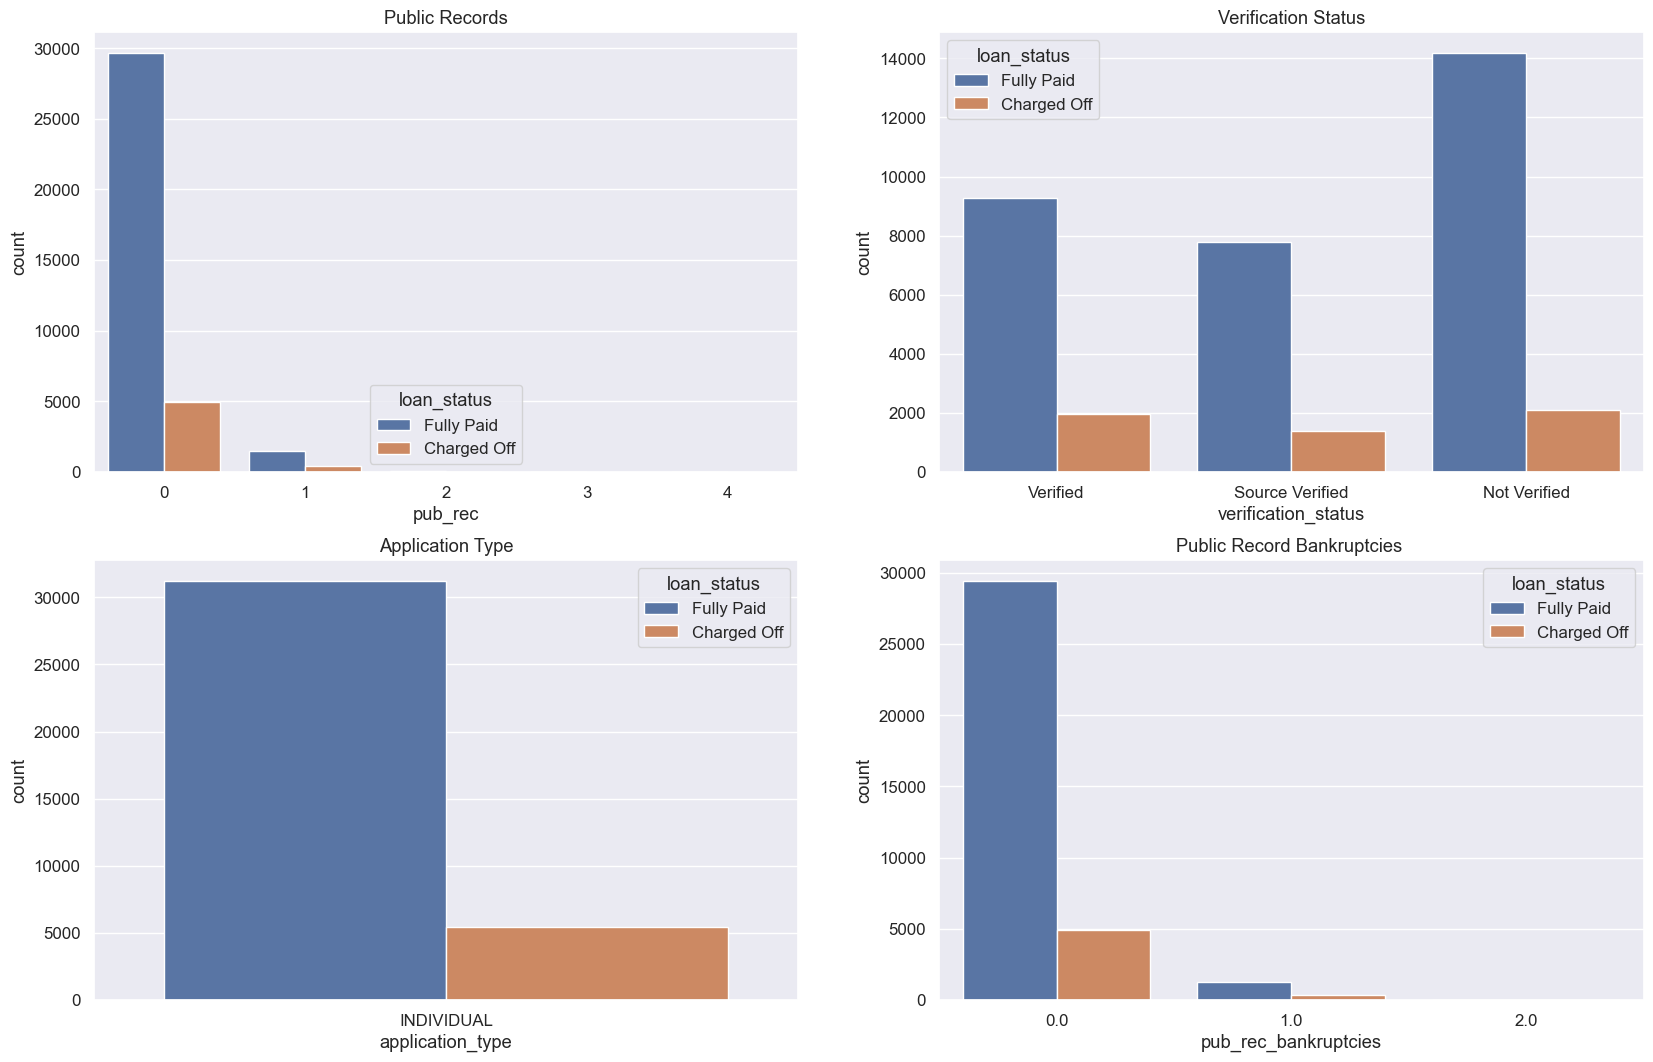

In [368]:
# Some other columns to look out for
plt.figure(figsize=(20, 40))

plt.subplot(6, 2, 1)
ax1 = sns.countplot(x='pub_rec', data=loan, hue='loan_status')
ax1.set_title("Public Records")

plt.subplot(6, 2, 2)
ax2 = sns.countplot(x='verification_status', data=loan, hue='loan_status')
ax2.set_title("Verification Status")

plt.subplot(6, 2, 3)
ax3 = sns.countplot(x='application_type', data=loan, hue='loan_status')
ax3.set_title("Application Type")

plt.subplot(6, 2, 4)
ax4 = sns.countplot(x='pub_rec_bankruptcies', data=loan, hue='loan_status')
ax4.set_title("Public Record Bankruptcies ")


fig.tight_layout()
plt.show()

#### Like previous columns, it's hard to conclude any result for these columns as features for default status. So, we'll apply the same operation of generating Charged Off Proportion for these columns too.

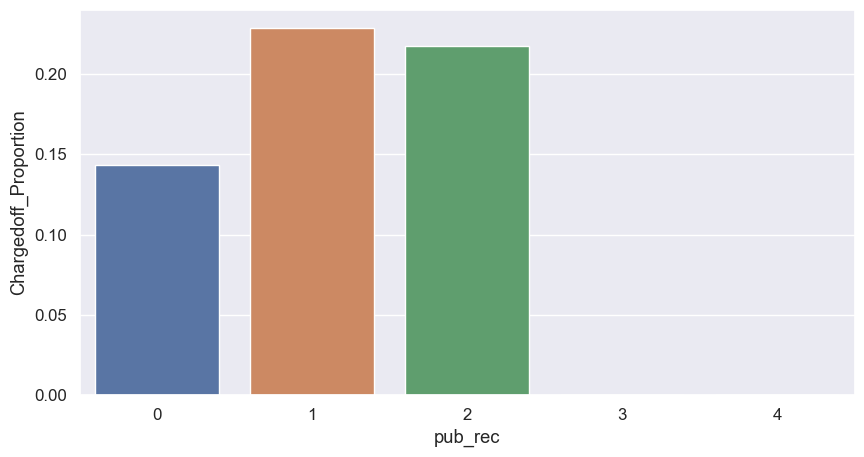

In [360]:
#Showing Charged Off proportion against Public Records
pub_rec_loan = loan.groupby(['pub_rec', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_loan['Total'] = pub_rec_loan['Charged Off'] + pub_rec_loan['Fully Paid'] 
pub_rec_loan['Chargedoff_Proportion'] = pub_rec_loan['Charged Off'] / pub_rec_loan['Total']

plt.figure(figsize=(10,5))
ax=sns.barplot(x='pub_rec',y='Chargedoff_Proportion',data=pub_rec_loan)

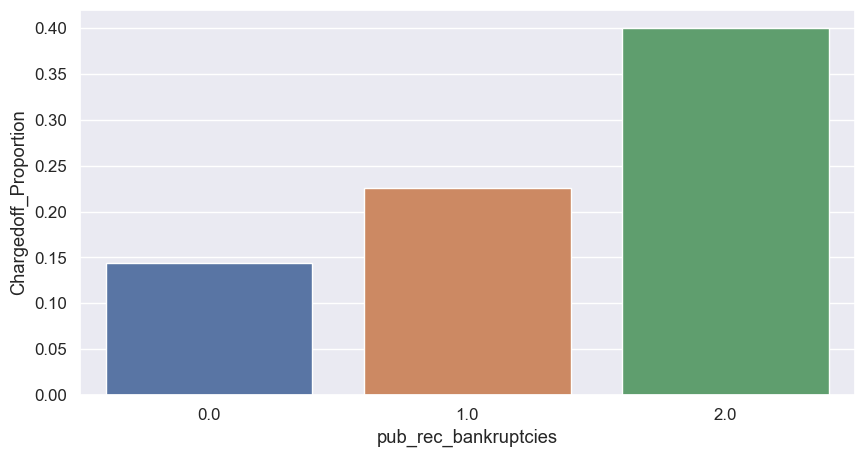

In [367]:
#Showing Charged Off proportion against Bankruptcies Records
bankrupt_loan = loan.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankrupt_loan['Total'] = bankrupt_loan['Charged Off'] + bankrupt_loan['Fully Paid'] 
bankrupt_loan['Chargedoff_Proportion'] = bankrupt_loan['Charged Off'] / bankrupt_loan['Total']

plt.figure(figsize=(10,5))
ax=sns.barplot(x='pub_rec_bankruptcies',y='Chargedoff_Proportion',data=bankrupt_loan)

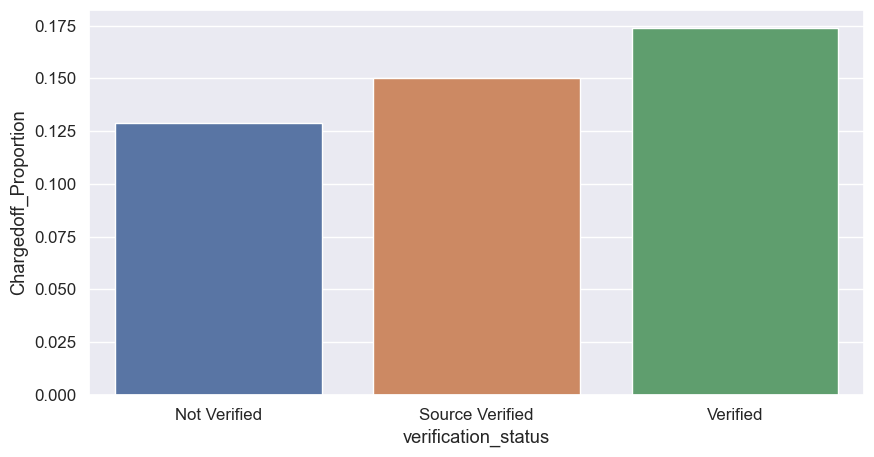

In [372]:
#Showing Charged Off proportion against Public Records
ver_loan = loan.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
ver_loan['Total'] = ver_loan['Charged Off'] + ver_loan['Fully Paid'] 
ver_loan['Chargedoff_Proportion'] = ver_loan['Charged Off'] / ver_loan['Total']

plt.figure(figsize=(10,5))
ax=sns.barplot(x='verification_status',y='Chargedoff_Proportion',data=ver_loan)

#### Observations from above charts:
1. A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts 
2. your ability to qualify for credit or other services. Public records and collections are derogatory items
3. because they reflect financial obligations that were not paid as agreed.
4. Those who already have pub_rec value 1 or 2 have charged off chances higher than who have no Derogatory Public Record.
5. pub_rec count 3-4 has less numbers so cannot reach on any conclusions.

6. Those who already have pub_rec_bankruptcies value 1, have charged off proportion higher than who have no pub_rec_bankruptcies.
7. pub_rec_bankruptcies count 2 has even higher charged off proportion but those numbers are not significant to decide.
8. Not known is the column for which we don't have any information abount borrower.
9. This also makes sense that who has defaulted before has more chances of dafaulting in future as well.
10. Suprisingly, Accounts that are not verified generate more revenue than the ones with verified status. Hence Verified accounts have higher ratio of defualters.

### Interest Rate is an important factor with domain point of view. Let's try to find some insights into it.

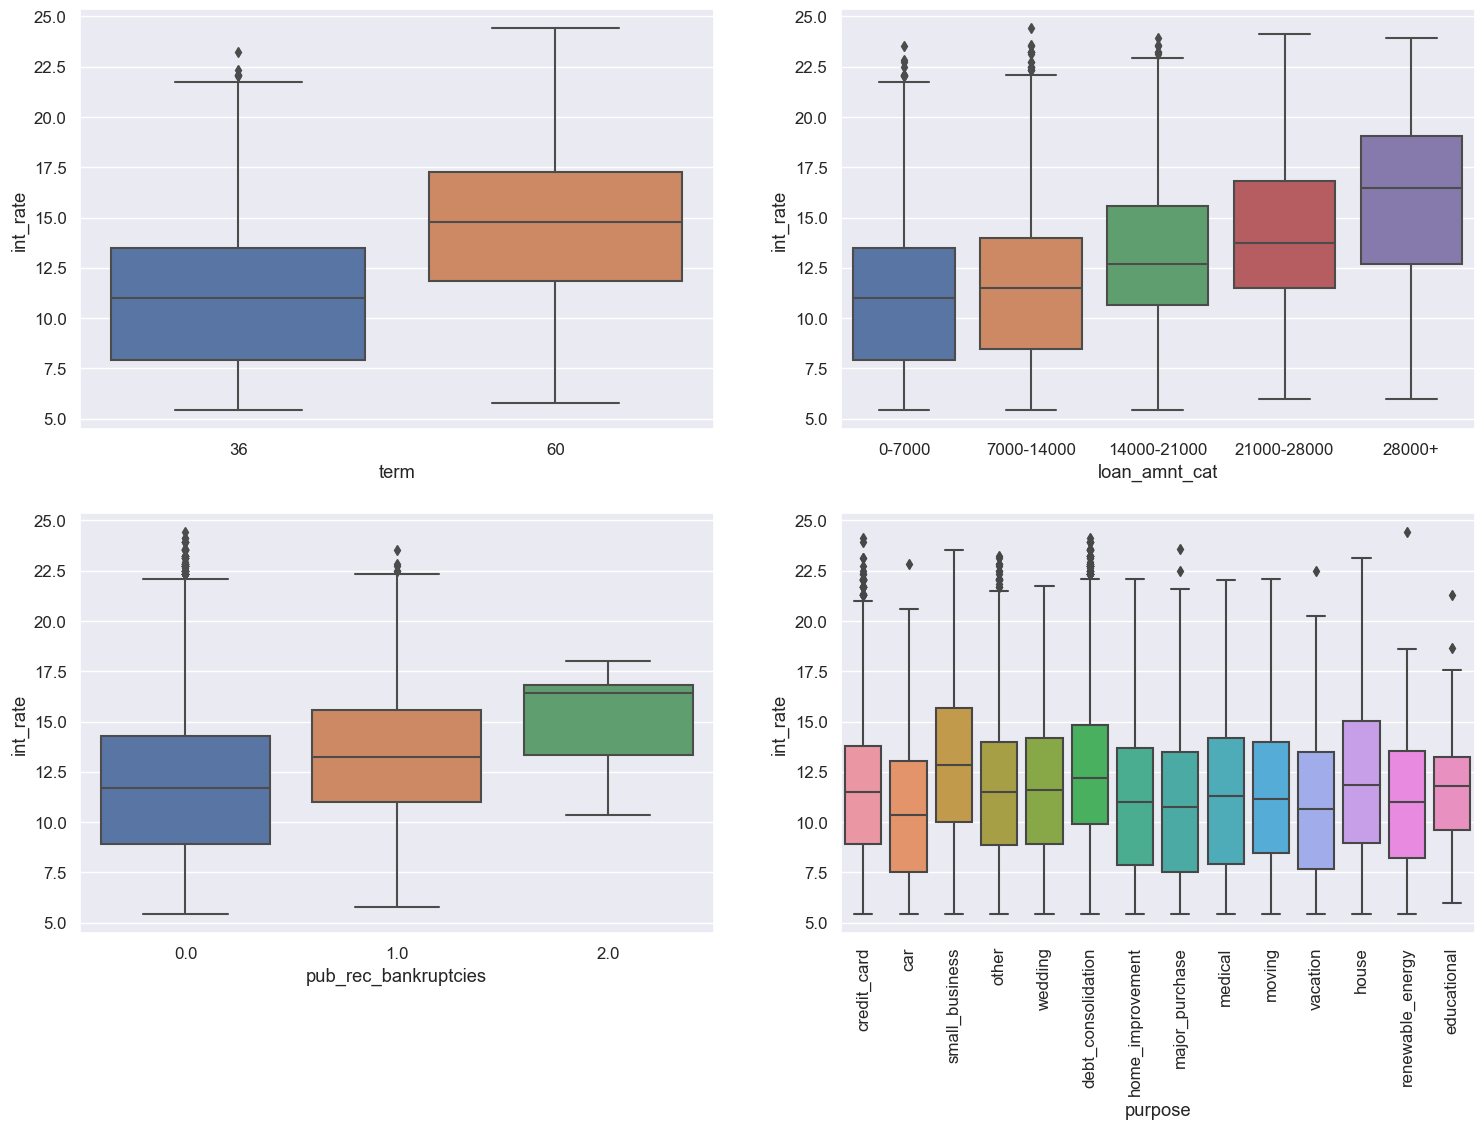

In [381]:
fig, axes = plt.subplots(2, 2, figsize=(18,12))

sns.boxplot(x='term', y='int_rate', data=loan, ax=axes[0, 0])
sns.boxplot(x='loan_amnt_cat', y='int_rate', data=loan, ax=axes[0, 1])
plt.xticks(rotation=50)
sns.boxplot(x='pub_rec_bankruptcies', y='int_rate', data=loan, ax=axes[1, 0])
plt.xticks(rotation=90)
sns.boxplot(x='purpose', y='int_rate', data=loan, ax=axes[1, 1])
plt.xticks(rotation=90)

plt.show()

#### Observations from above graphs:
1. It is clear that avearge intrest rate is higher for 60 months loan term.
2. Most of the loans issued for longer term had higher intrest rates for repayement.
3. It is clear that intrest rate is increasing with loan amount increase.
4. probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the interest rate.
5. Interest Rate increases with increasing number of public bankruptcies.
6. We earlier saw that small business as purpose contributed more to the defaulters. This can be explained with int_rate vs purpose graph as small_business has higher interest rate as compared to others.
7. Other than small_business, debt_consolidation as the pupose also has higher average interest rate with some extreme values (outliers).

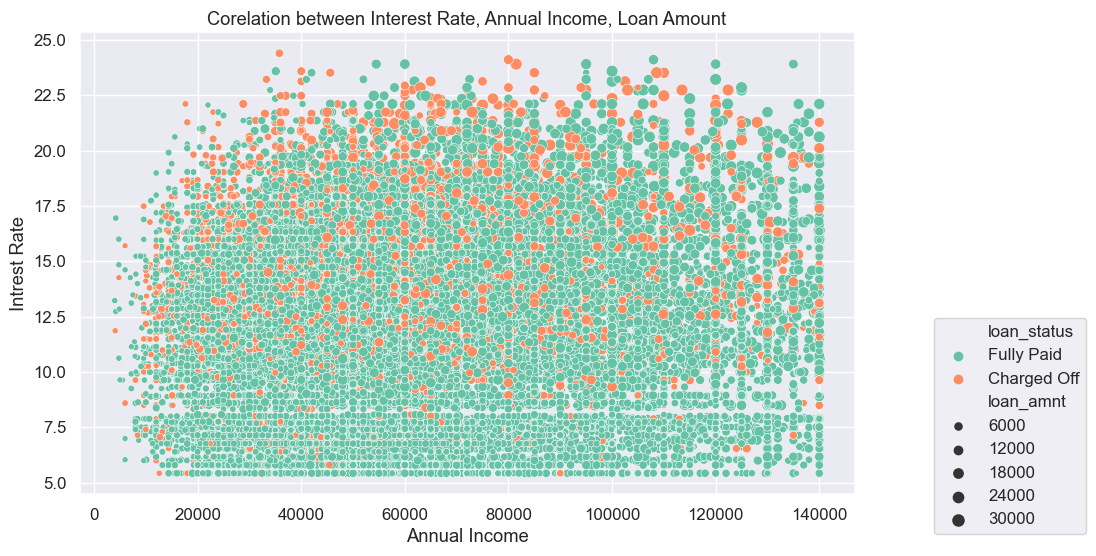

In [400]:
# Scatter plot of interest rate and Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan, x='annual_inc', y= 'int_rate', hue='loan_status',size = "loan_amnt", palette='Set2')
plt.title('Corelation between Interest Rate, Annual Income, Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Intrest Rate')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

Though there are no absolute clusters but we can see more green dots collected at the bottom and more reds on top-left corner side. This means that high interest rate and low income are major factors for defualts.

Also size of dots (showing loan amount size), is lower for people with lower income and rises as income rises.
Overall, Loan Amount, Interest Rate, and Annual Income are positively corelated.However, for low income rates, we can observe an imoprtant insight that there're very few numbers of defualters and small 

#### However, for low interest rates, we can observe an imoprtant insight that there're very few numbers of defualters and small increase in loan amount, making it a safe category with default status point of view.

### Final Observations
#### 1. With increase in loan amount there is an increase in intrest rate
#### 2. Intrest rate is increasing with loan amount & in increases is there in high charged off.
#### 3. Higher the annual income higher the loan amount, provided interest rate is more.
#### 4. Higher intrest rate results in high Charged Off ratio yet numbers of defaulters.
#### 5. For future refernce, fields to consider are , Public Records, Purpose, Bankruptcies, etc.; analysis with insights of these columns are given above in the notebook cells.